# not finished yet

In [396]:
from data_analysis import DataAnalysis
import os
import matplotlib.pyplot as plt
import nltk
import numpy as np

## 1. basic analysis

In [460]:
def read_data2(filename):
    """
    helper method to read the file line by line
    :param filename: the file to read data from - csv
    :return: the complete data in a list
    """
    complete_data = []
    # open the file with utf8 encoding, split it at the comma (it should be csv)
    with open(filename, encoding="utf8") as f:
        for lines in f:
            # the train file is separates by semicolons instead of commas
            line = lines.strip("\n").split(',')
            if "pap" in filename:
                temp_line=[]
                if line[1] == "implausible":
                    temp_line.append('0')
                else:
                    temp_line.append('1')
                temp_line.append(line[0])
                complete_data.append(temp_line)
            else:
                complete_data.append(line)

    return complete_data[1:]  # skip the header

class DataAnalysis2(DataAnalysis):
    def __init__(self, filenames_list):
        self.file_content = []
        for i in filenames_list:
            self.file_content+=read_data2(i)
        self.all_tokens = self.extract_word_tokens()
        self.word_dict = self.store_words()
        self.num_unique_tokens = self.unique_word_count()
        self.total_token_count = self.total_word_count()
        self.readability_scores = self.readability()
        self.pos_mapping = self.pos_tags()
        self.unique_pos = {}
        self.pos_counts = self.count_pos_bigrams()
        self.classes_num = self.class_count()
        self.pos_bigrams_counts = self.pos_bi_count()
        self.pos_unigrams_counts = self.pos_uni_count()
    
    def class_count(self):
        """
        Count the quantities for each category separately.
        :return: a set of class and its count
        """
        classes_num = {"0":0, "1":0}
        for i in self.file_content:
            classes_num [i[0]] += 1
        return classes_num
    
    def pos_bi_count(self):
        '''
        Count and sort the quantities for each pos tag separately.
        :return: a sorted set of pos and its count
        '''
        result = dict(sorted(self.pos_counts.items(), key=lambda item: item[1], reverse=True))
        return result
    
    def pos_uni_count(self):
        '''
        Count and sort the quantities for each pos tag separately.
        :return: a sorted set of pos and its count
        '''
        result=[{},{},{}]
        for i in self.pos_mapping:
            for j in range(len(i)):
                if i[j][1] not in result[j]:
                    result[j][i[j][1]]=1
                else:
                    result[j][i[j][1]]+=1
        result=[dict(sorted(i.items(), key=lambda item: item[1], reverse=True)) for i in result]
        return result
    
    def plot_pos_uni_distribution(self):
        '''
        Plot the distribution of pos tags for each class.
        '''
        labels1, values1 = zip(*self.pos_unigrams_counts[0].items())
        labels2, values2 = zip(*self.pos_unigrams_counts[1].items())
        labels3, values3 = zip(*self.pos_unigrams_counts[2].items())

        fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(6, 5),gridspec_kw={'hspace': 0.3})
        ax1.bar(labels1, values1, color='blue')
        ax1.set_title('Subject',fontsize=8,position=(0.5, 1.05))
        ax1.tick_params(axis='both', which='both', labelsize=8)
        ax1.set_yticks(range(0, max(values1)+ 1, max(values1)//5) ) # Set y-axis ticks to intervals of 200

        ax2.bar(labels2, values2, color='green')
        ax2.set_title('Verb', fontsize=8,position=(0.5, 1.05))
        ax2.tick_params(axis='both', which='both', labelsize=8)
        ax2.set_yticks(range(0, max(values1) + 1, max(values1)//5))  # Set y-axis ticks to intervals of 200

        ax3.bar(labels3, values3, color='red')
        ax3.set_title('Object', fontsize=8,position=(0.5, 1.05))
        ax3.tick_params(axis='both', which='both', labelsize=8)
        ax3.set_yticks(range(0, max(values1) + 1, max(values1)//5))  # Set y-axis ticks to intervals of 200

        #plt.tight_layout()
        plt.show()

In [461]:
def get_filepath(name,classnum_name,file_name):
    '''
    param name: name of the dataset, pep-3k or pap
    param classnum_name: for pap dataset, binary or multiclass
    param file_name: dev, test, train
    return: the str of apath of the file
    '''
    current_dir =os.path.realpath(".")
    parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir))
    filepath=os.path.abspath(os.path.join(parent_dir,name,'train-dev-test-split',classnum_name,file_name+'.csv'))
    return filepath

def get_dataset(*args):
    '''
    param arges: the str of file names
    return: the complete data in a list
    '''
    filenames_list=[]
    for i in args:
        print('get file from:',i)
        filenames_list.append(i)
    data_set=DataAnalysis2(filenames_list)
    return data_set


In [462]:
filepath1=get_filepath('pap','binary','train')
filepath2=get_filepath('pap','binary','dev')
filepath3=get_filepath('pap','binary','test')
filepath4=get_filepath('pep-3k','','train')
filepath5=get_filepath('pep-3k','','dev')
filepath6=get_filepath('pep-3k','','test')

In [463]:
data_set1=get_dataset(filepath1)
data_set2=get_dataset(filepath2)
data_set3=get_dataset(filepath3)
data_set4=get_dataset(filepath4)
data_set5=get_dataset(filepath5)
data_set6=get_dataset(filepath6)

get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/test.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/test.csv


In [464]:
data_set_com1=get_dataset(filepath1,filepath2,filepath3)
data_set_com2=get_dataset(filepath4,filepath5,filepath6)

get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pap/train-dev-test-split/binary/test.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/train.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/dev.csv
get file from: /home/linux1/BOX/modeling_sematic_23w/pep-3k/train-dev-test-split/test.csv


In [465]:
print('pap:number of rows and columns, number of classes')
print('train:',data_set1.dataset_statistics(),data_set1.classes_num)
print('dev:',data_set2.dataset_statistics(), data_set2.classes_num)
print('test:',data_set3.dataset_statistics(), data_set3.classes_num)
print('total:',data_set_com1.dataset_statistics(), data_set_com1.classes_num)
print('pep_3k:number of rows and columns, number of classes')
print('train:',data_set4.dataset_statistics(), data_set4.classes_num)
print('dev:',data_set5.dataset_statistics(), data_set5.classes_num)
print('test:',data_set6.dataset_statistics(), data_set6.classes_num)
print('total:',data_set_com2.dataset_statistics(), data_set_com2.classes_num)

pap:number of rows and columns, number of classes
train: (1728, 2) {'0': 861, '1': 867}
dev: (216, 2) {'0': 110, '1': 106}
test: (216, 2) {'0': 109, '1': 107}
total: (2160, 2) {'0': 1080, '1': 1080}
pep_3k:number of rows and columns, number of classes
train: (2449, 2) {'0': 1227, '1': 1222}
dev: (306, 2) {'0': 153, '1': 153}
test: (307, 2) {'0': 154, '1': 153}
total: (3062, 2) {'0': 1534, '1': 1528}


# 1. tokens (word counts)

In [466]:
print('pap:total_tokens, num_unique_tokens')
print('train:',len(data_set1.all_tokens),data_set1.num_unique_tokens)
print('dev:',len(data_set2.all_tokens),data_set2.num_unique_tokens)
print('test:',len(data_set3.all_tokens),data_set3.num_unique_tokens)
print('total:',len(data_set_com1.all_tokens),data_set_com1.num_unique_tokens)
print('pep_3k:total_tokens,num_unique_tokens')
print('train:',len(data_set4.all_tokens),data_set4.num_unique_tokens)
print('dev:',len(data_set5.all_tokens),data_set5.num_unique_tokens)
print('test:',len(data_set6.all_tokens),data_set6.num_unique_tokens)
print('total:',len(data_set_com2.all_tokens),data_set_com2.num_unique_tokens)

pap:total_tokens, num_unique_tokens
train: 5184 2460
dev: 648 553
test: 648 544
total: 6480 2749
pep_3k:total_tokens,num_unique_tokens
train: 7347 561
dev: 918 330
test: 921 315
total: 9186 584


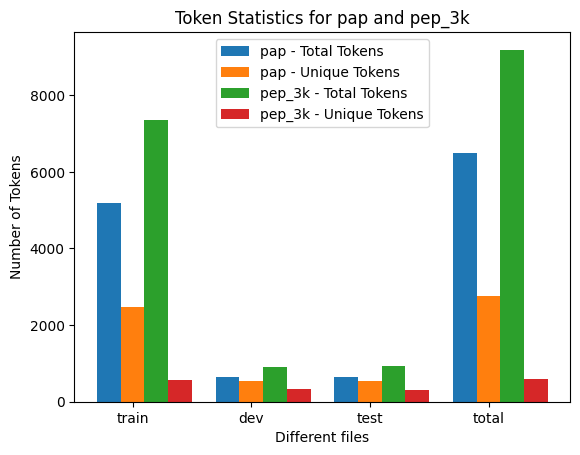

In [467]:
# Draw the bar chart for token statistics
# Data for pap
pap_data = {
    'train': {'total_tokens': 5184, 'num_unique_tokens': 2460},
    'dev': {'total_tokens': 648, 'num_unique_tokens': 553},
    'test': {'total_tokens': 648, 'num_unique_tokens': 544},
    'total': {'total_tokens': 6480, 'num_unique_tokens': 2749}
}

# Data for pep_3k
pep_3k_data = {
    'train': {'total_tokens': 7347, 'num_unique_tokens': 561},
    'dev': {'total_tokens': 918, 'num_unique_tokens': 330},
    'test': {'total_tokens': 921, 'num_unique_tokens': 315},
    'total': {'total_tokens': 9186, 'num_unique_tokens': 584}
}

categories = list(pap_data.keys())
pap_total_tokens = [pap_data[category]['total_tokens'] for category in categories]
pap_unique_tokens = [pap_data[category]['num_unique_tokens'] for category in categories]

pep_3k_total_tokens = [pep_3k_data[category]['total_tokens'] for category in categories]
pep_3k_unique_tokens = [pep_3k_data[category]['num_unique_tokens'] for category in categories]

bar_width = 0.20
index = np.arange(len(categories))

fig, ax = plt.subplots()

bar1 = ax.bar(index - bar_width, pap_total_tokens, bar_width, label='pap - Total Tokens')
bar2 = ax.bar(index , pap_unique_tokens, bar_width, label='pap - Unique Tokens')

bar3 = ax.bar(index+bar_width/2, pep_3k_total_tokens, bar_width, label='pep_3k - Total Tokens', align='edge')
bar4 = ax.bar(index + bar_width*1.5, pep_3k_unique_tokens, bar_width, label='pep_3k - Unique Tokens', align='edge')

ax.set_xlabel('Different files')
ax.set_ylabel('Number of Tokens')
ax.set_title('Token Statistics for pap and pep_3k')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


###
The total number of tokens of pap is less than the training set of pep-3k, but the number of unique tokens of pap is more than that of pep-3k.  

It shows that there are more repeated words in pep-3k.

## 2.POS

In [468]:
print('pap:unique_pos')
print(len(data_set1.unique_pos)) #18
print(len(data_set2.unique_pos)) #12
print(len(data_set3.unique_pos)) #12
print(len(data_set_com1.unique_pos))
print('pep_3k:unique_pos')
print(len(data_set4.unique_pos)) #17
print(len(data_set5.unique_pos)) #14
print(len(data_set6.unique_pos)) #12
print(len(data_set_com2.unique_pos))

pap:unique_pos
18
12
12
18
pep_3k:unique_pos
17
14
12
18


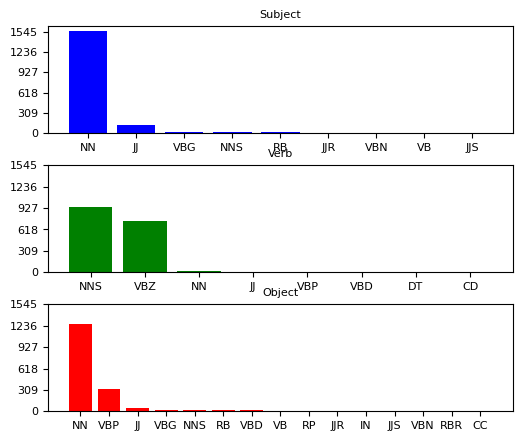

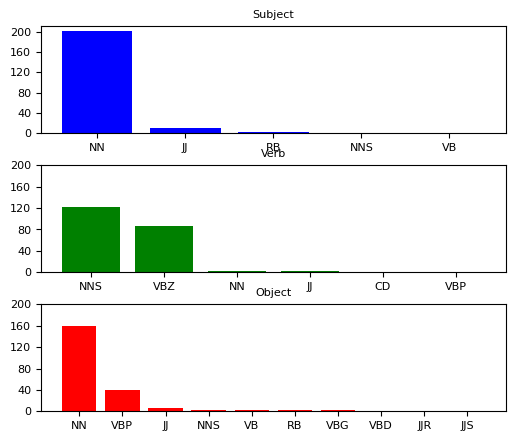

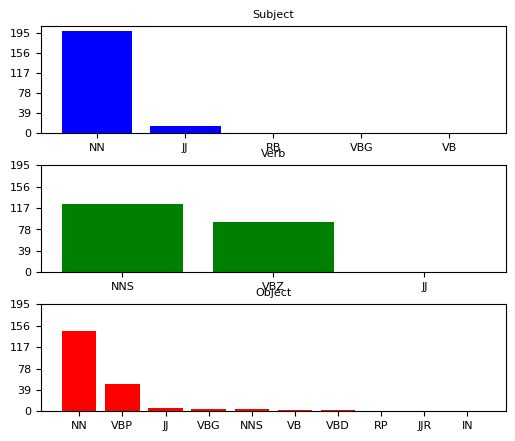

In [469]:
data_set1.plot_pos_uni_distribution()
data_set2.plot_pos_uni_distribution()
data_set3.plot_pos_uni_distribution()

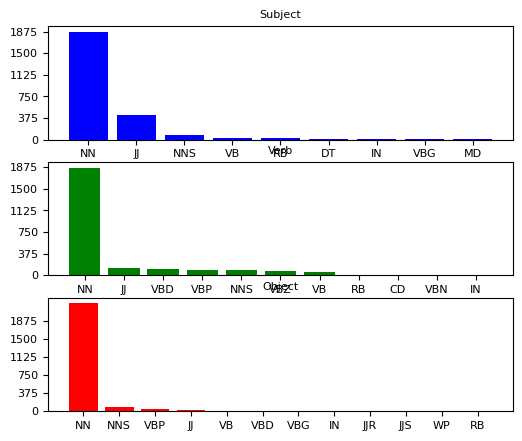

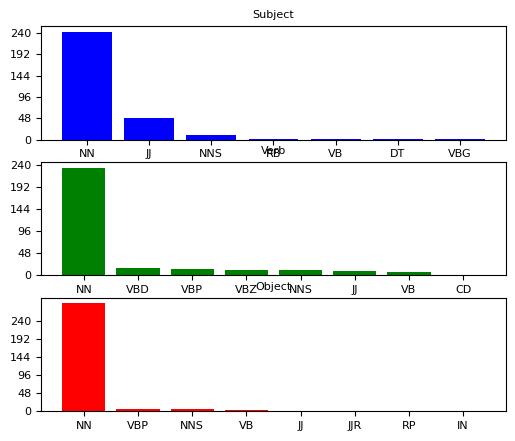

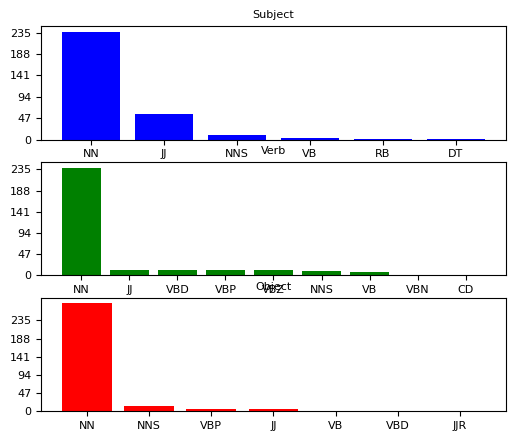

In [449]:
data_set4.plot_pos_uni_distribution()
data_set5.plot_pos_uni_distribution()
data_set6.plot_pos_uni_distribution()

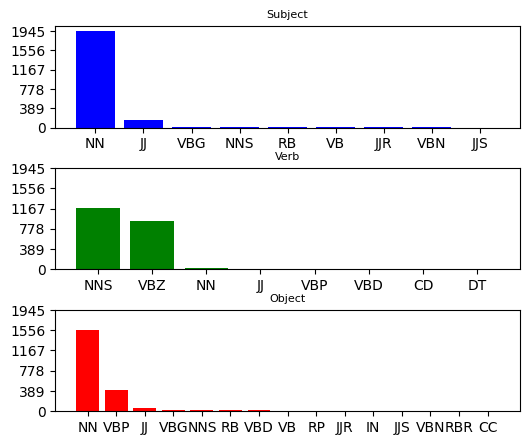

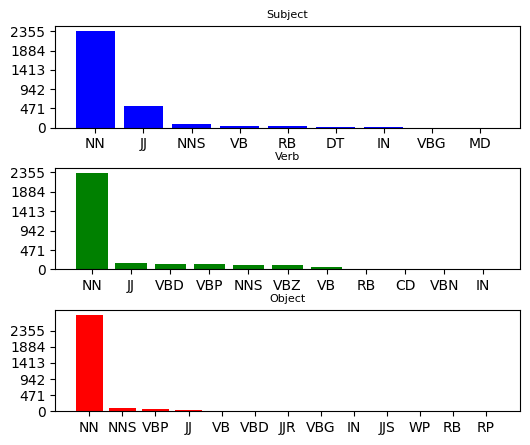

In [418]:
data_set_com1.plot_pos_uni_distribution()
data_set_com2.plot_pos_uni_distribution()

In [55]:
pos1=data_set1.pos_bigrams_counts
pos2=data_set2.pos_bigrams_counts
pos3=data_set3.pos_bigrams_counts
pos4=data_set4.pos_bigrams_counts
pos5=data_set5.pos_bigrams_counts
pos6=data_set6.pos_bigrams_counts
pos_com1=data_set_com1.pos_bigrams_counts
pos_com2=data_set_com2.pos_bigrams_counts

In [56]:
bigram_pos1=[i for i in list(pos_com1)[:10]]+[i for i in list(pos1)[:5]]+[i for i in list(pos2)[:5]]+[i for i in list(pos3)[:5]]
from collections import OrderedDict
bigram_pos1 = list(OrderedDict.fromkeys(bigram_pos1))
print(bigram_pos1)


bigram_pos_values1=np.zeros((3, len(bigram_pos1)))
print(bigram_pos1)
for i in bigram_pos1:
    if i not in pos1:
        pos1[i]=0
    if i not in pos2:
        pos2[i]=0
    if i not in pos3:
        pos3[i]=0

for i in range(len(bigram_pos1)):
    bigram_pos_values1[0][i]=pos1[bigram_pos1[i]]
    bigram_pos_values1[1][i]=pos2[bigram_pos1[i]]
    bigram_pos_values1[2][i]=pos3[bigram_pos1[i]]
print(bigram_pos_values1)

['NN NNS', 'NN VBZ', 'VBZ NN', 'NNS NN', 'NNS VBP', 'JJ NNS', 'VBZ JJ', 'NN NN', 'VBZ NNS', 'JJ VBZ']
['NN NNS', 'NN VBZ', 'VBZ NN', 'NNS NN', 'NNS VBP', 'JJ NNS', 'VBZ JJ', 'NN NN', 'VBZ NNS', 'JJ VBZ']
[[801. 715. 639. 572. 319. 104.  40.  44.  18.  20.]
 [111.  85.  75.  77.  40.   9.   5.   5.   3.   1.]
 [109.  89.  76.  69.  48.  13.   6.   0.   3.   1.]]


In [57]:
def plot_bigram_pos(bigram_pos,bigram_pos_values):
    plt.figure(figsize=(10, 6)) 
    
    for i in range(len(bigram_pos_values)):
        plt.plot(bigram_pos, bigram_pos_values[i], marker='o', label=f'Data {i + 1}')

    # Adding title and labels
    plt.title('Line Plot for POS Combinations')
    plt.xlabel('POS Combination')
    plt.ylabel('Count')

    # Adding legend
    plt.legend()

    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()


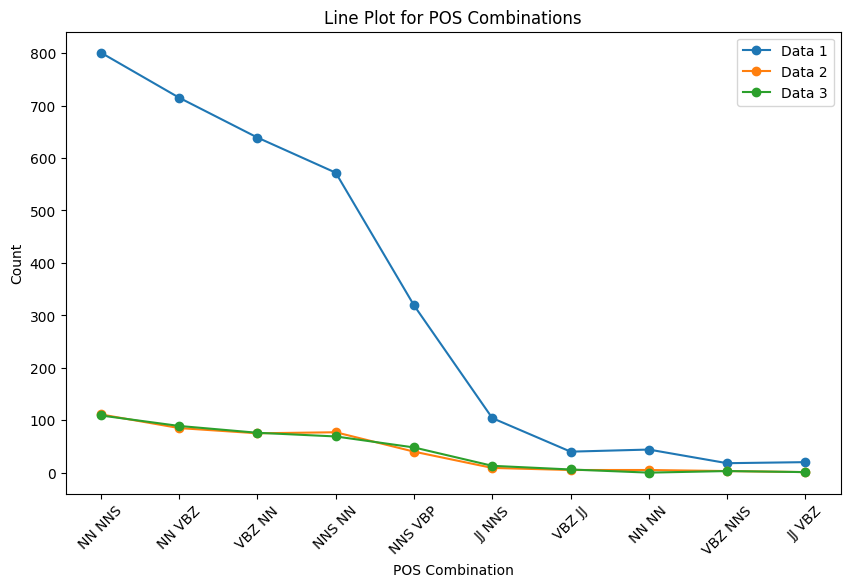

In [13]:
plot_bigram_pos(bigram_pos1,bigram_pos_values1)

['NN NN', 'JJ NN', 'NN NNS', 'NNS VBP', 'NN VBD', 'NN JJ', 'VBP NN', 'NN VBZ', 'VBD NN', 'VB NN']
['NN NN', 'JJ NN', 'NN NNS', 'NNS VBP', 'NN VBD', 'NN JJ', 'VBP NN', 'NN VBZ', 'VBD NN', 'VB NN']
[[3232.  507.  134.  104.   92.   98.   87.   83.   75.   69.]
 [ 417.   53.   12.   15.   17.    7.   13.   12.   15.    7.]
 [ 411.   60.   21.   12.   10.    8.   11.   11.    9.    9.]]


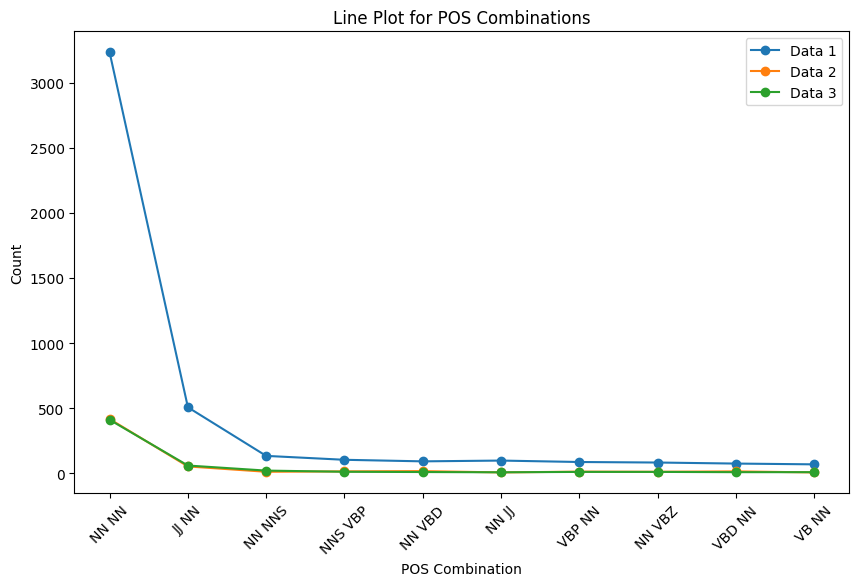

In [14]:
bigram_pos2=[i for i in list(pos_com2)[:10]]+[i for i in list(pos4)[:5]]+[i for i in list(pos5)[:5]]+[i for i in list(pos6)[:5]]
bigram_pos2= list(OrderedDict.fromkeys(bigram_pos2))
print(bigram_pos2)


bigram_pos_values2=np.zeros((3, len(bigram_pos2)))
print(bigram_pos2)
for i in bigram_pos2:
    if i not in pos4:
        pos1[i]=0
    if i not in pos5:
        pos2[i]=0
    if i not in pos6:
        pos3[i]=0

for i in range(len(bigram_pos2)):
    bigram_pos_values2[0][i]=pos4[bigram_pos2[i]]
    bigram_pos_values2[1][i]=pos5[bigram_pos2[i]]
    bigram_pos_values2[2][i]=pos6[bigram_pos2[i]]
print(bigram_pos_values2)

plot_bigram_pos(bigram_pos2,bigram_pos_values2)

In [15]:
bigram_pos2=[i for i in list(pos_com2)[:10]]+[i for i in list(pos4)[:5]]+[i for i in list(pos5)[:5]]+[i for i in list(pos6)[:5]]
print([i for i in list(pos_com2)[:10]])
print([i for i in list(pos4)[:5]])
print([i for i in list(pos5)[:5]])
print([i for i in list(pos6)[:5]])
bigram_pos2= list(OrderedDict.fromkeys(bigram_pos2))
print(bigram_pos2)

['NN NN', 'JJ NN', 'NN NNS', 'NNS VBP', 'NN VBD', 'NN JJ', 'VBP NN', 'NN VBZ', 'VBD NN', 'VB NN']
['NN NN', 'JJ NN', 'NN NNS', 'NNS VBP', 'NN JJ']
['NN NN', 'JJ NN', 'NN VBD', 'VBD NN', 'NNS VBP']
['NN NN', 'JJ NN', 'NN NNS', 'NNS VBP', 'VBP NN']
['NN NN', 'JJ NN', 'NN NNS', 'NNS VBP', 'NN VBD', 'NN JJ', 'VBP NN', 'NN VBZ', 'VBD NN', 'VB NN']
